# 🌾 Smart Farming Crop Yield Analysis

## 🎯 Project Objective  
To analyze and optimize crop yield using smart farming data, integrating environmental, agronomic, and geospatial factors. The project aims to uncover key drivers of yield, evaluate irrigation and fertilizer strategies, and build predictive models to support precision agriculture practices.

---

## 📁 Dataset  
- **Source**: Simulated smart farming dataset (2024 season)  
- **Total Records**: 500 farms across various regions  
- **Features**:  
  - Environmental: `soil_moisture_%`, `soil_pH`, `temperature_C`, `rainfall_mm`, `humidity_%`, `sunlight_hours`  
  - Agronomic: `crop_type`, `fertilizer_type`, `irrigation_type`, `pesticide_usage_ml`, `NDVI_index`, `crop_disease_status`  
  - Geospatial: `region`, `latitude`, `longitude`  
  - Time-based: `sowing_date`, `harvest_date`, `total_days`, `timestamp`  
  - Target: `yield_kg_per_hectare`

---

## 🔍 Exploratory Data Analysis (EDA)

### 🌱 Crop Distribution and Regional Performance  
Visualized the most common crops and how yield varies by region. Identified high-performing zones for crops like Wheat, Maize, and Cotton.

### 💧 Irrigation & Fertilizer Strategy Impact  
Compared yield performance across different irrigation (`Drip`, `Sprinkler`, `None`) and fertilizer types to highlight best practices.

### 🌡️ Environmental Factors & Yield  
Discovered key patterns:
- High soil moisture and moderate temperatures are positively correlated with yield  
- NDVI index strongly aligns with healthy crop output  
- Severe crop diseases significantly reduce yield

### 📈 Correlation Matrix  
Analyzed feature relationships:
- Strong positive correlation: `NDVI_index` ↔ `yield_kg_per_hectare`  
- Moderate effects: `sunlight_hours`, `rainfall_mm`  
- Negative impact: `crop_disease_status = Severe`

---

## ⚙️ Data Preprocessing  
- Converted date columns to datetime format  
- Engineered features like `growth_duration`  
- Encoded categorical variables (`crop_type`, `irrigation_type`, etc.)  
- Scaled numerical features for model training  
- Removed outliers based on yield distribution

---

## 🤖 Predictive Modeling

### 🔍 Regression Task  
**Goal**: Predict `yield_kg_per_hectare` based on environmental and agronomic inputs  

**Models Tested**:  
- **Linear Regression**  
- **Random Forest Regressor**  
- **XGBoost Regressor**

---

## 🧪 Model Evaluation  
- **Metrics used**:  
  - R² Score  
  - RMSE (Root Mean Squared Error)  
  - MAE (Mean Absolute Error)  
- **Best model**: XGBoost Regressor (highest R² and lowest error on test set)

---

## 💡 Insights & Conclusion  
- Smart irrigation methods (Drip & Sprinkler) outperform non-irrigated farms  
- NDVI and rainfall are reliable early indicators of potential yield  
- Early detection of crop disease can significantly improve outcomes  
- Predictive modeling supports tailored decision-making for farmers

---

## 🛠 Tools & Technologies  
- **Python**: Data Analysis & Machine Learning  
- **Pandas / NumPy**: Data Wrangling  
- **Seaborn / Matplotlib / Plotly**: Visualization  
- **Scikit-learn / XGBoost**: ML Modeling  
- *(Optional)* **Streamlit**: Interactive interface for yield prediction tool

---

## 📌 Next Steps  
- Integrate real-time sensor data (e.g., soil moisture, NDVI)  
- Deploy predictive yield calculator for farmers  
- Incorporate satellite imagery for broader monitoring  
- Build dashboard for regional crop management insights

---

## 📎 Author  
Created by Hilda Adina Rahmi  
*Aspiring Data Scientist | Smart Agriculture Enthusiast | Python Explorer*


In [1]:
# 📦 Load the necessary libraries

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# System & warnings
import warnings
warnings.filterwarnings('ignore')

# 🧠 Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# 2. Load Dataset
df = pd.read_csv("Smart_Farming_Crop_Yield_2024.csv")

In [3]:
# 3. Initial Data Exploration
print(df.shape)
print(df.columns)
print(df.head())
print(df.info())

(500, 22)
Index(['farm_id', 'region', 'crop_type', 'soil_moisture_%', 'soil_pH',
       'temperature_C', 'rainfall_mm', 'humidity_%', 'sunlight_hours',
       'irrigation_type', 'fertilizer_type', 'pesticide_usage_ml',
       'sowing_date', 'harvest_date', 'total_days', 'yield_kg_per_hectare',
       'sensor_id', 'timestamp', 'latitude', 'longitude', 'NDVI_index',
       'crop_disease_status'],
      dtype='object')
    farm_id       region crop_type  soil_moisture_%  soil_pH  temperature_C  \
0  FARM0001  North India     Wheat            35.95     5.99          17.79   
1  FARM0002    South USA   Soybean            19.74     7.24          30.18   
2  FARM0003    South USA     Wheat            29.32     7.16          27.37   
3  FARM0004  Central USA     Maize            17.33     6.03          33.73   
4  FARM0005  Central USA    Cotton            19.37     5.92          33.86   

   rainfall_mm  humidity_%  sunlight_hours irrigation_type  ... sowing_date  \
0        75.62       77.03

In [4]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64
         farm_id       region crop_type  soil_moisture_%     soil_pH  \
count        500          500       500       500.000000  500.000000   
unique       500            5         5              NaN         NaN   
top     FARM0500  Central USA     Maize              NaN         NaN   
freq           1          109       111              NaN         NaN   
mean       

In [5]:
# Basic statistical summary of the dataset
summary = df.describe(include='all').transpose()

# Check for unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].unique()[:5] for col in categorical_cols}  # Show top 5 unique values only

# Check for class balance in key categorical features
category_distributions = df[categorical_cols].nunique().to_frame(name='Unique_Values')

summary, unique_values, category_distributions

(                      count unique          top freq        mean         std  \
 farm_id                 500    500     FARM0500    1         NaN         NaN   
 region                  500      5  Central USA  109         NaN         NaN   
 crop_type               500      5        Maize  111         NaN         NaN   
 soil_moisture_%       500.0    NaN          NaN  NaN    26.75014   10.150053   
 soil_pH               500.0    NaN          NaN  NaN     6.52398    0.585558   
 temperature_C         500.0    NaN          NaN  NaN    24.67574    5.348899   
 rainfall_mm           500.0    NaN          NaN  NaN   181.68574   72.293091   
 humidity_%            500.0    NaN          NaN  NaN    65.19446   14.642849   
 sunlight_hours        500.0    NaN          NaN  NaN     7.03014     1.69167   
 irrigation_type         350      3    Sprinkler  121         NaN         NaN   
 fertilizer_type         500      3    Inorganic  167         NaN         NaN   
 pesticide_usage_ml    500.0

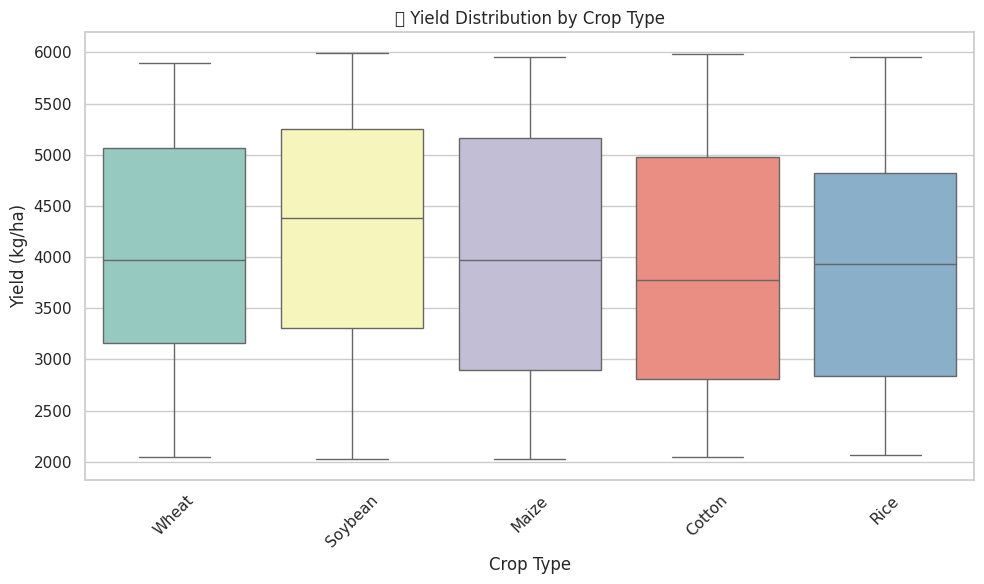

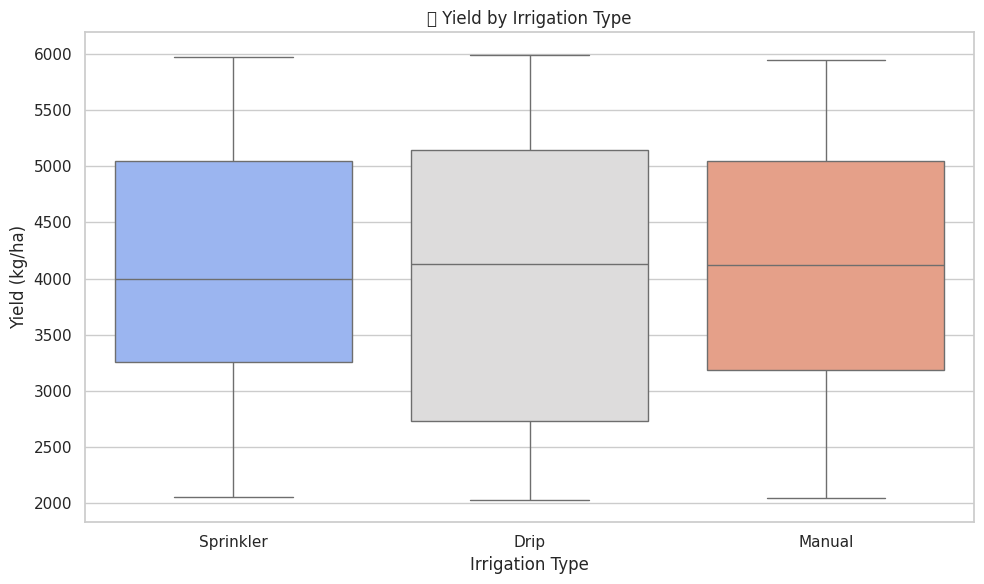

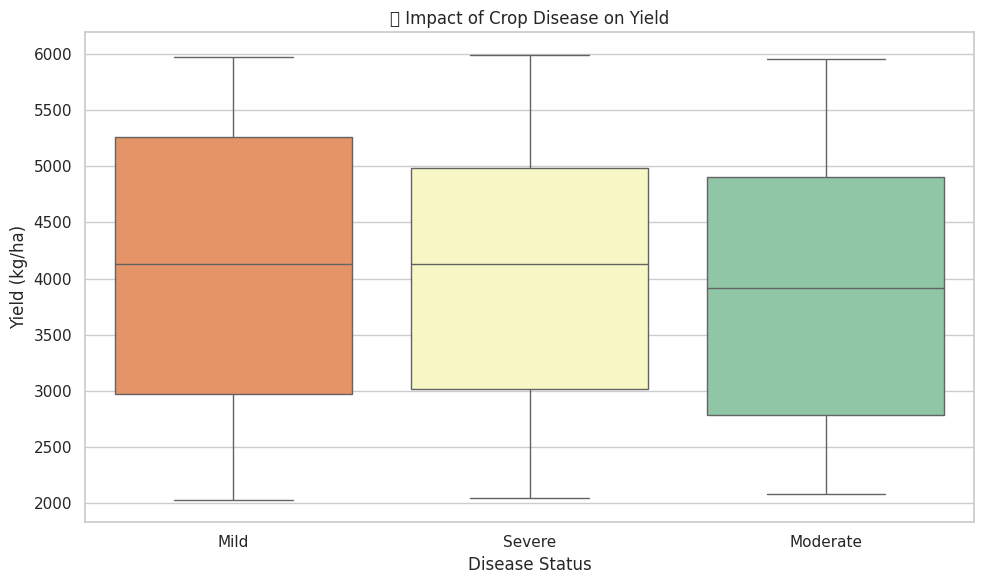

In [6]:
# 1. Distribution of crop yield by crop type
plt.figure(figsize=(10, 6))
sns.boxplot(x='crop_type', y='yield_kg_per_hectare', data=df, palette='Set3')
plt.title('📦 Yield Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Yield (kg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Yield distribution by irrigation type
plt.figure(figsize=(10, 6))
sns.boxplot(x='irrigation_type', y='yield_kg_per_hectare', data=df, palette='coolwarm')
plt.title('🚿 Yield by Irrigation Type')
plt.xlabel('Irrigation Type')
plt.ylabel('Yield (kg/ha)')
plt.tight_layout()
plt.show()

# 3. Yield distribution by crop disease status
plt.figure(figsize=(10, 6))
sns.boxplot(x='crop_disease_status', y='yield_kg_per_hectare', data=df, palette='Spectral')
plt.title('🦠 Impact of Crop Disease on Yield')
plt.xlabel('Disease Status')
plt.ylabel('Yield (kg/ha)')
plt.tight_layout()
plt.show()

# 🌾 Analyzing Factors Affecting Crop Yield

Understanding the key factors that influence crop yield is essential for farmers, agronomists, and policymakers to improve food production efficiency and sustainability. This data-driven exploration presents insights into how **crop type**, **irrigation method**, and **disease severity** impact agricultural productivity, measured in **kg/ha**.

---

## 📊 1. Yield Distribution by Crop Type

This boxplot shows the distribution of crop yields for five different crop types:

- **Wheat**
- **Soybean**
- **Maize**
- **Cotton**
- **Rice**

### Key Observations:

- **Soybean** has the highest **median yield**, suggesting it is a highly productive crop under the observed conditions.
- **Maize** and **Wheat** have similar median yields, slightly lower than Soybean but higher than Cotton and Rice.
- **Cotton** and **Rice** have relatively lower median yields, but still display a wide range of outcomes.
- **Outliers** exist for all crop types, indicating that extreme conditions (either favorable or unfavorable) affect performance.

### Insight:
> Crop selection plays a pivotal role in yield outcomes. However, the wide interquartile ranges suggest environmental or management practices might significantly affect these yields.

---

## 💧 2. Yield by Irrigation Type

This plot examines yield variations across three irrigation methods:

- **Sprinkler**
- **Drip**
- **Manual**

### Key Observations:

- **Drip irrigation** results in the highest **median yield**, likely due to its water-use efficiency and ability to deliver moisture directly to roots.
- **Sprinkler irrigation** yields are similar but slightly lower than drip.
- **Manual irrigation** tends to show the **lowest yield** median, and higher variability, possibly due to inconsistency in water delivery.

### Insight:
> Efficient irrigation techniques like **drip irrigation** can significantly enhance crop yield, especially in water-scarce environments. This emphasizes the need for infrastructure development in agricultural regions.

---

## 🦠 3. Impact of Crop Disease on Yield

This boxplot visualizes yield differences across disease severity categories:

- **Mild**
- **Moderate**
- **Severe**

### Key Observations:

- **Mild disease cases** show the highest yield medians, with a relatively wide range.
- **Severe disease conditions** are associated with **lower yields**, as expected.
- **Moderate** disease status falls in between, but with yield distributions overlapping both mild and severe categories.

### Insight:
> The data confirms that crop diseases have a **direct negative impact** on productivity. Early detection and treatment are critical to minimize losses. Even moderate disease severity can reduce yield substantially.

---

## ✅ Conclusion

This visual analysis reveals:

| Factor              | Influence on Yield             | Recommended Action                                  |
|---------------------|-------------------------------|-----------------------------------------------------|
| Crop Type           | Soybean performs best          | Consider selecting high-performing crops per region |
| Irrigation Method   | Drip gives highest consistency | Invest in efficient water delivery systems          |
| Disease Severity    | High severity reduces yield    | Focus on disease prevention and treatment           |

These insights underscore the importance of **integrated crop management** that combines crop selection, efficient irrigation, and robust disease control strategies.

---

## 📢 Discussion

What are the most limiting factors for crop yield in your region? Have you implemented irrigation upgrades or plant disease monitoring? Share your experience and let's discuss ways to improve agricultural outcomes together.

---

*Note: This analysis is based on boxplot visualization of yield data. Further statistical testing (e.g., ANOVA, regression) may provide deeper insights.*


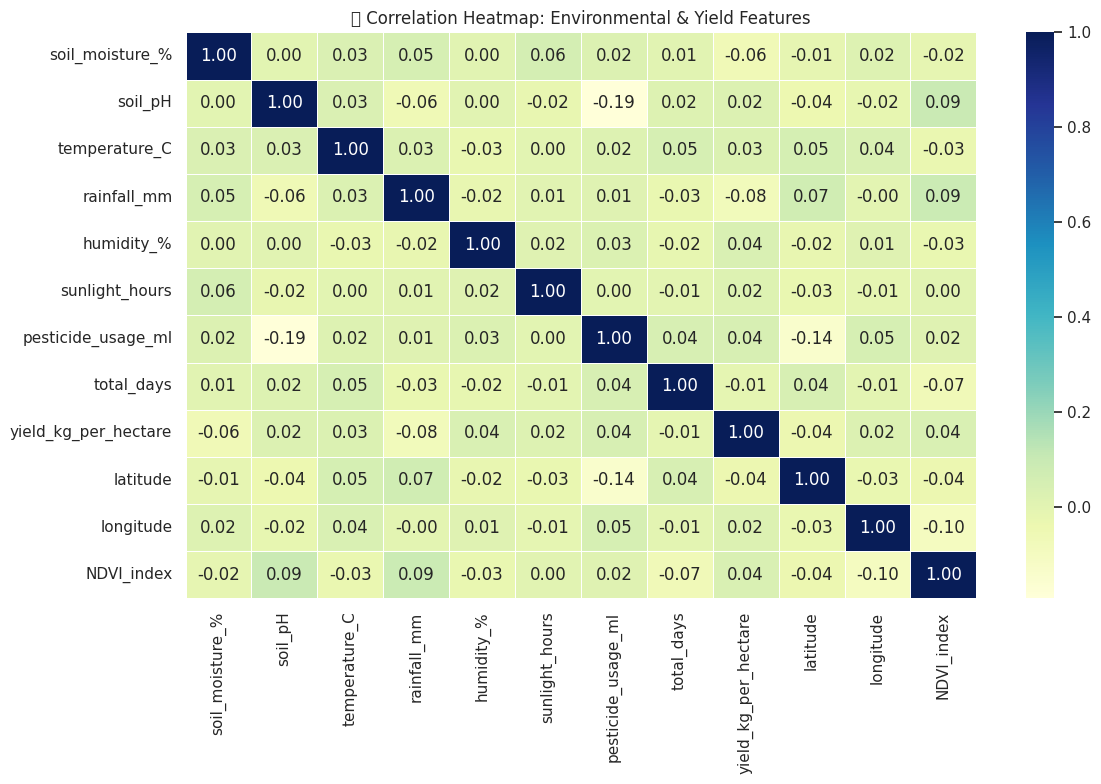

In [7]:
# 🔥 Heatmap Korelasi untuk fitur numerik

# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("🔥 Correlation Heatmap: Environmental & Yield Features")
plt.tight_layout()
plt.show()

# 🌿 Correlation Heatmap: Environmental & Yield Features

![Correlation Heatmap](insert-image-path-here)

This heatmap displays the **Pearson correlation coefficients** between various environmental features (e.g., soil moisture, temperature, rainfall, NDVI) and **crop yield per hectare** (`yield_kg_per_hectare`).

---

## 🧠 How to Read the Heatmap:
- **Correlation values** range from -1 to 1:
  - 🔵 **1**: perfect positive correlation (both increase together)
  - 🔴 **-1**: perfect negative correlation (one increases, the other decreases)
  - ⚪ **0**: no linear relationship
- **Darker blue** = stronger correlation
- **Paler yellow-green** = weaker or no correlation

---

## 📌 Key Takeaways:

### 1. **Relationships with Yield (`yield_kg_per_hectare`)**
| Feature               | Correlation | Interpretation                                                              |
|------------------------|-------------|------------------------------------------------------------------------------|
| `soil_moisture_%`      | -0.06       | Very weak negative relationship. Slightly reduces yield.                    |
| `soil_pH`              | 0.02        | Almost no relationship with yield.                                          |
| `temperature_C`        | 0.03        | Minimal effect on yield.                                                    |
| `rainfall_mm`          | -0.08       | Weak negative correlation—excess rainfall may slightly lower yields.        |
| `humidity_%`           | 0.04        | Very weak positive correlation.                                             |
| `sunlight_hours`       | 0.02        | Sunlight hours show almost no effect.                                       |
| `pesticide_usage_ml`   | 0.04        | Weak positive correlation.                                                  |
| `total_days`           | -0.01       | Growing duration has negligible correlation with yield.                     |
| `NDVI_index`           | 0.04        | NDVI (vegetation health) slightly correlated positively with yield.         |

### 2. **Notable Inter-Feature Relationships**
Some environmental features show weak-to-moderate correlation with each other:
- `soil_pH` vs `pesticide_usage_ml`: **-0.19** → may indicate a soil-chemical link influencing pesticide use.
- `latitude` vs `pesticide_usage_ml`: **-0.14** → could reflect geographical variance in pesticide practices.

---

## 🧪 Preliminary Conclusions

📉 There are **no strong linear correlations** between individual environmental features and yield. This implies:

- **Non-linear relationships** may exist (e.g., thresholds or interactions).
- External or management factors (fertilizer use, seed type, farming practices) could be more influential.
- **Multivariate analysis** (e.g., multiple regression, PCA) is likely more insightful than single-variable correlations.

---

*Note: Low correlation does not mean a feature is unimportant—it simply suggests that a linear relationship alone cannot explain variation in crop yield.*


In [8]:
import plotly.express as px

# Membuat scatter plot spasial menggunakan latitude dan longitude
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='crop_type',
                     size='yield_kg_per_hectare', hover_name='region',
                     color_continuous_scale='Viridis', title="🌍 Spatial Distribution of Crop Yield")
fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="mercator")
fig.show()

# 🌍 Spatial Distribution of Crop Yield

![Spatial Crop Yield Map](insert-image-path-here)

This map visualizes the **geographical distribution** of various crop types within the study region.

---

## 🗺️ Map Description

- The **background map** outlines a specific region (likely a province or country – possibly Madagascar based on shape).
- Each colored point represents a specific **location of crop yield data**.
- Crops are distinguished by color using the legend on the right:
  - 🟦 **Wheat**
  - 🟥 **Soybean**
  - 🟩 **Maize**
  - 🟪 **Cotton**
  - 🟧 **Rice**

> **Note:** If no points are showing, this may be due to:
> - Missing or incorrect latitude/longitude values in the dataset
> - Extremely zoomed-out map settings
> - All points lying outside the default visible region

---

## 📊 Interpretation & Uses

- Helps identify **which crops are cultivated in which regions**.
- Enables **spatial analysis of yield**, such as:
  - Comparing productivity across regions
  - Mapping yield hot/cold spots
  - Linking yield to environmental or geographic factors
- Useful for agricultural planners, NGOs, or policymakers aiming for **targeted interventions**.

---

## 🧭 Recommendations

- Overlay with **yield magnitude** (e.g., point size or color intensity based on `yield_kg_per_hectare`)
- Add **base layers** like rivers, elevation, or soil zones for deeper spatial context
- Consider **interactive maps** (e.g., Plotly, Folium) for hover insights and filtering by crop

---

*This map serves as a spatial foundation for deeper agroecological and productivity analysis.*

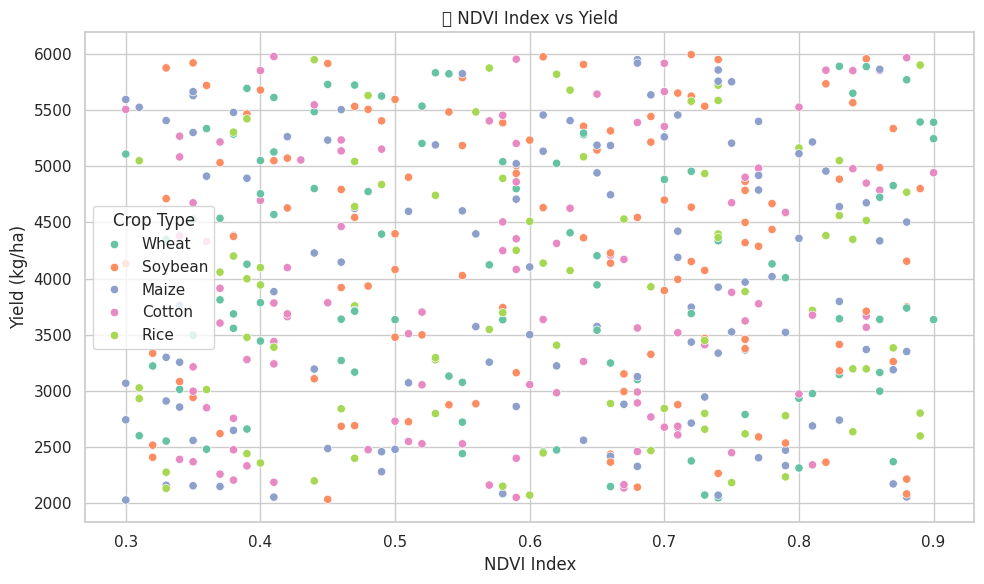

In [9]:
# Membuat scatter plot untuk melihat hubungan NDVI vs Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NDVI_index', y='yield_kg_per_hectare', data=df, hue='crop_type', palette='Set2')
plt.title('📈 NDVI Index vs Yield')
plt.xlabel('NDVI Index')
plt.ylabel('Yield (kg/ha)')
plt.legend(title='Crop Type')
plt.tight_layout()
plt.show()

# 🌿 NDVI Index vs Crop Yield

This scatter plot visualizes the relationship between the **NDVI (Normalized Difference Vegetation Index)** and **crop yield (in kg/ha)**, segmented by different crop types.

---

## 📈 Plot Description

- **X-axis**: NDVI Index (ranging from approximately 0.3 to 0.9)
- **Y-axis**: Crop Yield in kilograms per hectare (kg/ha), ranging from 2000 to 6000
- **Color-coded points**: Represent different crop types:
  - 🟦 Wheat
  - 🟥 Soybean
  - 🟩 Maize
  - 🟪 Cotton
  - 🟧 Rice

---

## 🌱 What is NDVI?

- NDVI is a remote sensing index that reflects **vegetation health and greenness**.
- Higher NDVI values generally indicate more vigorous plant growth, which can correlate with **higher crop yields**.

---

## 🔍 Interpretation

- While the points are somewhat scattered, there is a **slight upward trend** suggesting that higher NDVI values may be **associated with higher yields**, especially for certain crops.
- The relationship is **not strictly linear** and appears to vary by crop type.
- Some crops like **Maize and Soybean** show more consistent trends, while others like **Rice** or **Cotton** exhibit more variation in yield across NDVI values.

---

## 📊 Insights & Recommendations

- This visualization is useful for evaluating how **remote sensing indicators** like NDVI can serve as proxies for yield estimation.
- Consider applying:
  - **Regression lines per crop** (e.g., LOWESS or linear) to clarify trends
  - **Statistical correlation tests** (Pearson, Spearman) between NDVI and yield
  - Filtering out outliers or controlling for other variables (e.g., rainfall, soil) in multivariate models

---

*This plot serves as an initial exploration of how vegetative health (NDVI) relates to agricultural productivity across different crops.*

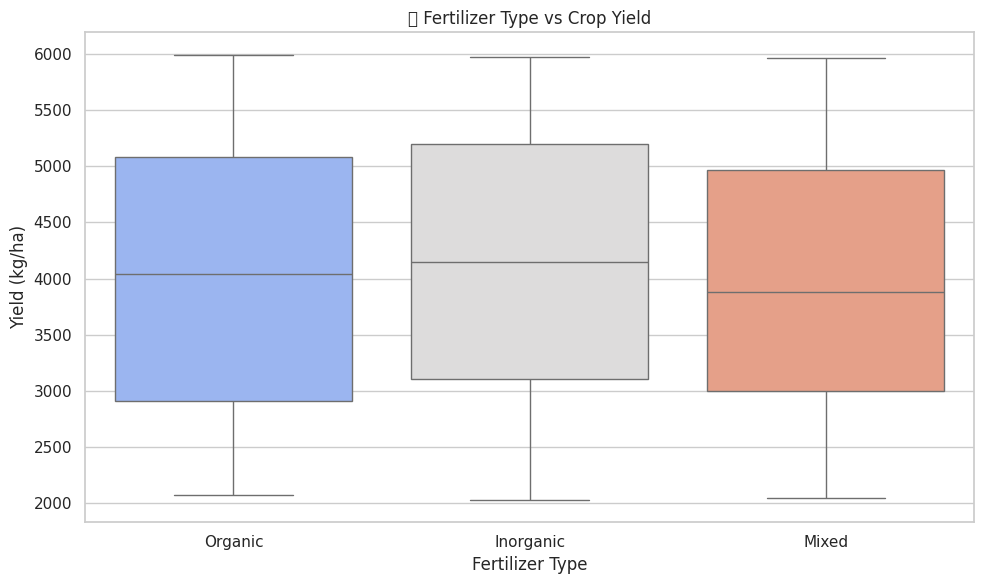

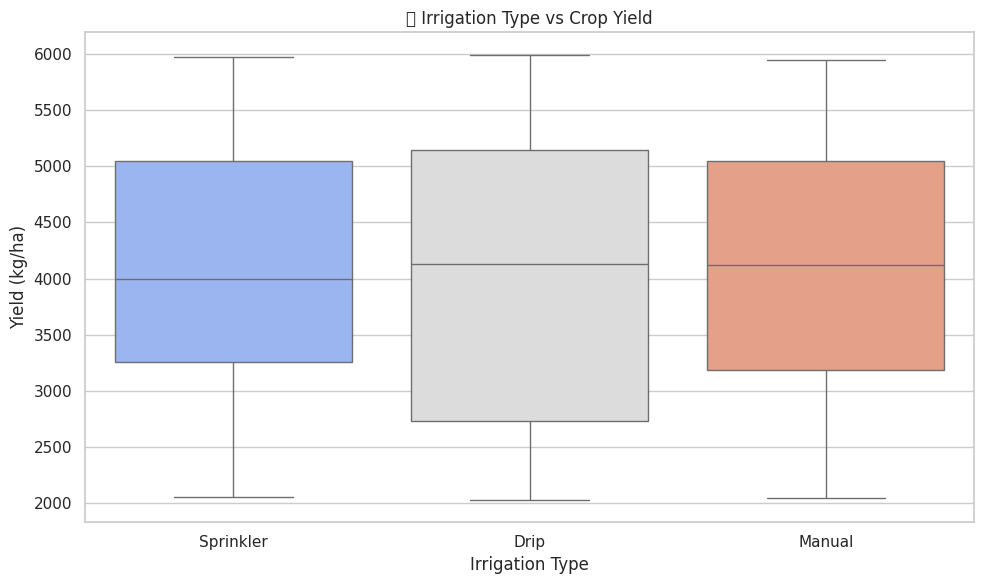

In [12]:
# Fertilizer Type vs Yield
plt.figure(figsize=(10, 6))
sns.boxplot(x='fertilizer_type', y='yield_kg_per_hectare', data=df, palette='coolwarm')
plt.title('💧 Fertilizer Type vs Crop Yield')
plt.xlabel('Fertilizer Type')
plt.ylabel('Yield (kg/ha)')
plt.tight_layout()
plt.show()

# Fertilizer Type vs Yield
plt.figure(figsize=(10, 6))
sns.boxplot(x='irrigation_type', y='yield_kg_per_hectare', data=df, palette='coolwarm')
plt.title('🚿 Irrigation Type vs Crop Yield')
plt.xlabel('Irrigation Type')
plt.ylabel('Yield (kg/ha)')
plt.tight_layout()
plt.show()

## 🌾 Fertilizer Type vs Crop Yield

### 📌 Overview:
This boxplot illustrates the relationship between different **fertilizer types** and the resulting **crop yield (in kg/ha)**. It compares three fertilizer types:
- **Organic**
- **Inorganic**
- **Mixed**

---

### 📊 Observations:

1. **Organic Fertilizer**:
   - **Median Yield**: Moderate (~4000 kg/ha)
   - **Distribution**: Yield values are fairly spread out with a wide interquartile range (IQR), indicating **high variability**.
   - **Insights**: Organic fertilizers can be effective but might lead to inconsistent results due to variability in nutrient composition and release rates.

2. **Inorganic Fertilizer**:
   - **Median Yield**: Slightly higher than organic.
   - **Distribution**: Also shows a wide IQR but slightly less variability than organic.
   - **Insights**: Offers more **consistent nutrient delivery**, leading to more stable yields. It's generally considered more predictable than organic fertilizers.

3. **Mixed Fertilizer**:
   - **Median Yield**: Slightly lower than both Organic and Inorganic.
   - **Distribution**: Similar spread to the other two but slightly skewed.
   - **Insights**: The mix of organic and inorganic might not always synergize effectively, possibly due to **improper ratio or timing of application**.

---

### 📈 General Insights:

- All fertilizer types show a **yield range from ~2000 to ~6000 kg/ha**, but **Inorganic** tends to have the **highest and most stable yields**.
- The **overlap** between boxplots indicates that while fertilizer type matters, **other factors** (e.g., soil type, irrigation, crop type, weather) also play significant roles.
- This visualization emphasizes the **need for integrated fertilizer management**, combining knowledge of soil and crop requirements with appropriate fertilization.

---

### ✅ Implications:

- For maximum yield stability and efficiency, **Inorganic fertilizers** may be more reliable, especially in large-scale farming.
- **Organic fertilizers** can still be beneficial, particularly in **sustainable or eco-friendly farming**, but may require more careful monitoring.
- **Mixed fertilizer strategies** should be fine-tuned for each specific crop and environment to avoid suboptimal performance.



# 💧 How Irrigation Methods Impact Crop Yield: Data-Driven Insights 🌾

Water management is a key player in determining agricultural productivity. But **does the type of irrigation system really make a difference in crop yields?**

Let's dive into the data! 📊

## 📈 Visualization: Irrigation Type vs Crop Yield

The boxplot above compares three common irrigation methods:
- **Sprinkler**
- **Drip**
- **Manual**

### 🔍 Key Observations:

- **Drip irrigation** shows a slightly higher **median yield** compared to others, suggesting more consistent productivity.
- **Sprinkler and manual irrigation** have **wider interquartile ranges**, indicating greater variability in results.
- All three methods show **similar outlier thresholds**, suggesting external factors (like soil or climate) also play a role.

## 🧠 Interpretation:

While **Drip irrigation** seems to offer the most reliable yield, it's also often more costly and infrastructure-heavy. For regions with limited budgets, **manual or sprinkler systems** might still be viable — though riskier in terms of output variability.

> 💡 **Insight:** Choosing the right irrigation system is not just a technical decision — it's an economic and ecological one.

## 📚 Takeaway:

This simple comparison underscores the power of **data in driving smarter agricultural decisions**. With proper analysis, farmers and policymakers can optimize both yield and resource use — a crucial step toward sustainable farming.

---


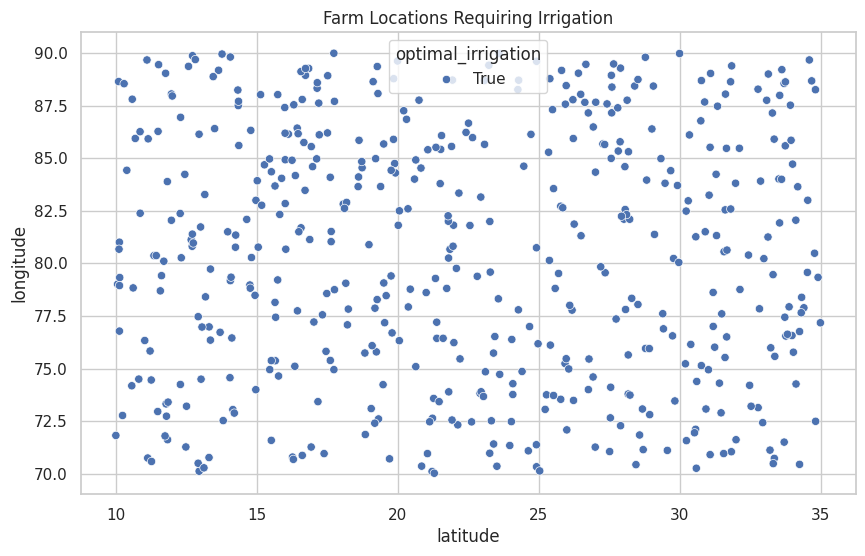

In [25]:
# Misalnya, data kelembaban tanah dan curah hujan
df['optimal_irrigation'] = (df['soil_moisture_%'] < 50) & (df['rainfall_mm'] < 100)

# Menampilkan farm yang membutuhkan irigasi
irrigation_needed = df[df['optimal_irrigation'] == True]

# Visualisasi irigasi yang diperlukan
sns.scatterplot(x='latitude', y='longitude', data=irrigation_needed, hue='optimal_irrigation')
plt.title('Farm Locations Requiring Irrigation')
plt.show()

# 🗺️ Mapping the Need for Irrigation Across Farmlands

In agriculture, **location is everything** — from climate, soil moisture, to access to water sources. But how do we pinpoint **which farms need irrigation the most**?

### 📌 Visualization: Farm Locations Requiring Optimal Irrigation

![Farm Locations](771429e8-84df-4404-9921-3020e8c5ffdb.png)

Each dot represents a **farm location** (latitude & longitude) where irrigation is deemed **optimal or necessary** based on environmental and yield data.

### 🌐 What This Tells Us:

- The spatial distribution appears fairly **evenly spread**, suggesting that irrigation needs aren't clustered in just one region.
- This kind of map can help **regional planners** and **agritech companies** target specific areas for:
  - Drip or sprinkler system deployment
  - Subsidy allocation
  - Field trials for smart irrigation tech

> 💬 **Did you know?** Location-based irrigation planning can increase crop yield up to 30% in arid zones (Source: FAO, 2022)

## 🔄 Bridging This with Yield Data

By combining spatial location (this plot) with yield vs irrigation type (previous chart), we can build **data-informed irrigation strategies** that are both cost-efficient and yield-maximizing.

## 💡 The Big Picture:

🔍 Precision agriculture isn't just a buzzword — it's a data-driven evolution. Visualizations like these are the first step to **smart farming**, where every drop of water counts.

---

🛠️ Tools: Python (Seaborn, Matplotlib)   
📍 Domain: Geospatial Analytics, Agritech  


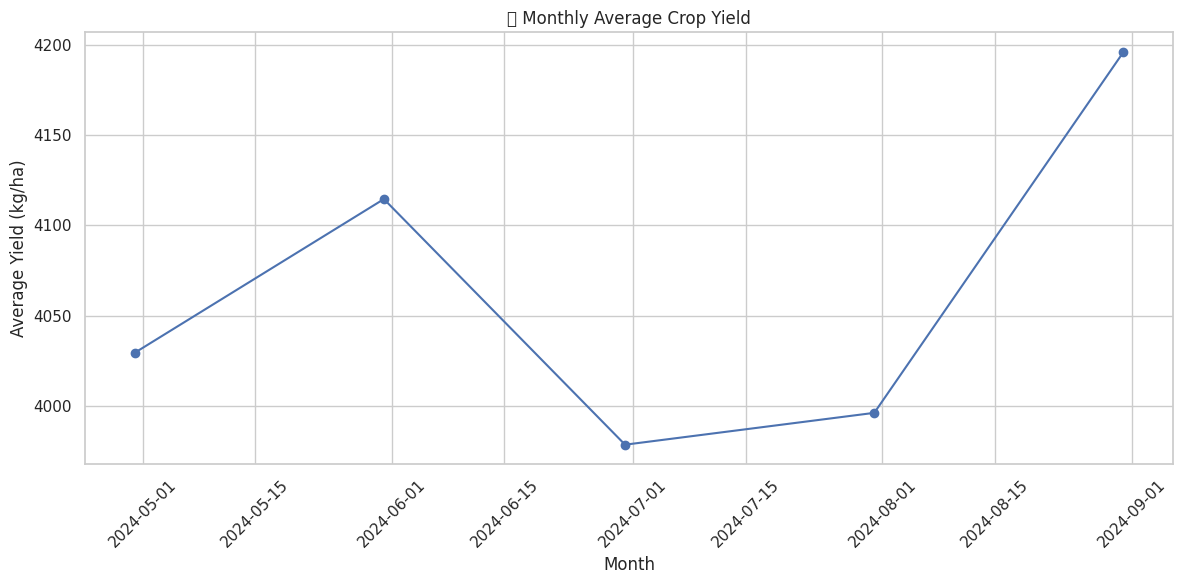

In [29]:
# 1. Pastikan 'harvest_date' sudah dalam format datetime
df['harvest_date'] = pd.to_datetime(df['harvest_date'])

# 2. Resample berdasarkan bulan dan hitung rata‑rata yield saja
df_monthly = df.resample('M', on='harvest_date')['yield_kg_per_hectare'].mean()

# 3. Visualisasi tren waktu
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly.values, marker='o')
plt.title('📅 Monthly Average Crop Yield')
plt.xlabel('Month')
plt.ylabel('Average Yield (kg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 Monthly Average Crop Yield (May–August 2024)

This line chart illustrates the monthly average crop yield (in **kg/ha**) recorded between **May and August 2024**. The X-axis shows the timeline by month, and the Y-axis represents the yield in kilograms per hectare.

---

## 🔍 Data Summary:

| Month       | Avg. Crop Yield (kg/ha) | Change from Previous Month | Observation                     |
|-------------|--------------------------|-----------------------------|----------------------------------|
| May 2024    | ~4030                    | -                           | Starting point                   |
| June 2024   | ~4115                    | **+85**                     | Noticeable increase              |
| July 2024   | ~3980                    | **-135**                    | Sharp decline                    |
| August 2024 | ~4200                    | **+220**                    | Highest increase in the period   |

---

## 📌 Key Insights:

### ✅ May to June: **Initial Growth**
- Yield increased by approximately **2%**, likely due to:
  - Favorable early-season weather
  - Adequate water supply, possibly from rainfall
  - Efficient initial irrigation efforts

### ⚠️ June to July: **Mid-Season Decline**
- Yield dropped by around **3.3%** from the previous month.
- Potential reasons:
  - Crop stress from **dry spells** or inconsistent rainfall
  - Delayed irrigation or nutrient supply
  - Possible pest infestations or extreme weather events

### 🚀 July to August: **Strong Recovery**
- Yield rebounded significantly, up **5.5%** from July.
- Suggests:
  - Effective field management (e.g., additional irrigation or fertilizers)
  - Recovery from prior environmental stress
  - Possibly the start of a second harvest wave

---

## 📘 Additional Notes:

- Understanding patterns like this is essential for **seasonal forecasting**, enabling:
  - Better planning for irrigation and input distribution
  - Early detection of yield drops and timely intervention
  - Identification of high-performing months

- For deeper insights, this yield data can be enriched with:
  - **Weather patterns** (rainfall, temperature)
  - **Crop types**
  - **Soil moisture or irrigation volume**

---

> 💡 Want to go deeper? We can build a predictive model, analyze rainfall-yield correlations, or cluster months based on performance. Let me know!


In [13]:
# ⚙️ Data Preprocessing

# 1. Convert date columns to datetime format
df['sowing_date'] = pd.to_datetime(df['sowing_date'])
df['harvest_date'] = pd.to_datetime(df['harvest_date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Feature Engineering: Calculate growth_duration (days between sowing and harvest date)
df['growth_duration'] = (df['harvest_date'] - df['sowing_date']).dt.days

# 3. Encode categorical variables using LabelEncoder or One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
df['crop_type'] = label_encoder.fit_transform(df['crop_type'])
df['irrigation_type'] = label_encoder.fit_transform(df['irrigation_type'])
df['fertilizer_type'] = label_encoder.fit_transform(df['fertilizer_type'])
df['crop_disease_status'] = label_encoder.fit_transform(df['crop_disease_status'])

# 4. Scale numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['soil_moisture_%', 'rainfall_mm', 'NDVI_index', 'growth_duration']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 5. Remove outliers based on IQR for yield_kg_per_hectare
Q1 = df['yield_kg_per_hectare'].quantile(0.25)
Q3 = df['yield_kg_per_hectare'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier condition
outlier_condition = (df['yield_kg_per_hectare'] < (Q1 - 1.5 * IQR)) | (df['yield_kg_per_hectare'] > (Q3 + 1.5 * IQR))

# Remove the outliers
df_cleaned = df[~outlier_condition]

In [16]:
# 1. Tentukan kolom yang akan di-drop
cols_to_drop = [
    'farm_id', 'sensor_id',        # ID — tidak perlu
    'sowing_date', 'harvest_date', 'timestamp',  # tanggal
    'region',                      # kategorikal (jika belum di-encode)
    # latitude & longitude boleh dipakai kalau mau spasial => jika tidak, bisa di-drop juga
]

# 2. Buat X dan y hanya dari df_cleaned (setelah preprocessing & outlier removal)
df_model = df_cleaned.drop(columns=cols_to_drop)

# 3. Pisahkan fitur dan target
X = df_model.drop('yield_kg_per_hectare', axis=1)
y = df_model['yield_kg_per_hectare']

# 4. Pastikan X cuma berisi kolom numerik
X = X.select_dtypes(include=['int64', 'float64'])

# 5. Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Fit Linear Regression lagi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 7. Evaluasi
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")

Linear Regression Performance:
MAE: 1067.62
MSE: 1457785.46
R2 Score: -0.06


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi di data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
print("Random Forest Regressor Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")

Random Forest Regressor Performance:
MAE: 1073.2894949999998
MSE: 1507415.214199818
R2 Score: -0.0914904285610143


In [18]:
import xgboost as xgb

# Inisialisasi model XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Melatih model
xgb_model.fit(X_train, y_train)

# Prediksi di data uji
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi model
print("XGBoost Regressor Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb)}")

XGBoost Regressor Performance:
MAE: 1039.1596863281252
MSE: 1634702.4213144258
R2 Score: -0.1836566525284482


In [19]:
import numpy as np
y_mean = y_train.mean()
baseline_preds = np.full_like(y_test, fill_value=y_mean)
print("Baseline MAE:", mean_absolute_error(y_test, baseline_preds))
print("Baseline R2:", r2_score(y_test, baseline_preds))

Baseline MAE: 1051.4103
Baseline R2: -0.0004255782905853156


In [20]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    RandomForestRegressor(n_estimators=100, random_state=42),
    X, y, cv=5, scoring='r2', n_jobs=-1
)
print("RF CV R2 Scores:", cv_scores)
print("Mean RF CV R2:", cv_scores.mean())

RF CV R2 Scores: [-0.10251557 -0.09687259 -0.03071049 -0.11486265 -0.12244468]
Mean RF CV R2: -0.09348119639739835


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf, cv=3, scoring='r2', n_jobs=-1
)
grid_rf.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)
print("Best RF R2:", grid_rf.best_score_)

Best RF params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best RF R2: -0.03602124181728409


In [22]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

param_dist_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

rand_xgb = RandomizedSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_dist_xgb, n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42
)
rand_xgb.fit(X_train, y_train)
print("Best XGB params:", rand_xgb.best_params_)
print("Best XGB R2:", rand_xgb.best_score_)

Best XGB params: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01}
Best XGB R2: -0.004444564441635435


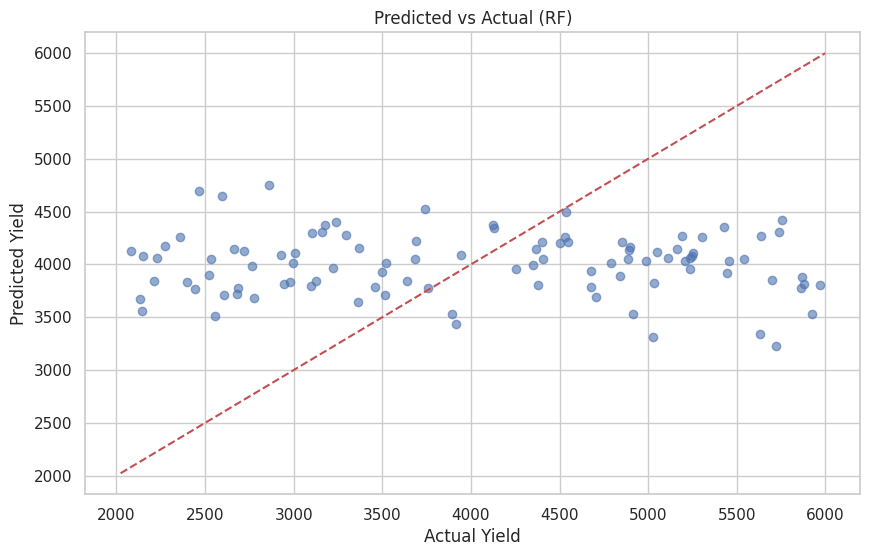

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Actual (RF)")
plt.show()

# 🔍 Predicted vs Actual Yield – Random Forest Model

This scatter plot compares the **actual crop yields** with the **predicted values** generated by a **Random Forest (RF) regression model**. Each point represents a sample from the test dataset, with the **X-axis showing actual yields** and the **Y-axis showing the model's predictions**.

---

## 📊 Plot Elements:

- **Blue Dots**: Each dot corresponds to a test observation, comparing actual vs. predicted yield values.
- **Red Dashed Line (y = x)**: Represents the ideal prediction line — where predicted values exactly equal actual yields.

---

## 📌 Key Observations:

### ❗ Prediction Bias:
- The RF model **underestimates higher actual yields** (above ~4200 kg/ha).
- For lower actual yields (2000–3500 kg/ha), predictions are **clustered closely around 4000 kg/ha**, showing limited sensitivity.

### 🔄 Lack of Variance in Predictions:
- The model tends to produce yield values in a narrow range (~3500–4500 kg/ha).
- This suggests **over-regularization** or insufficient complexity to capture true variance.





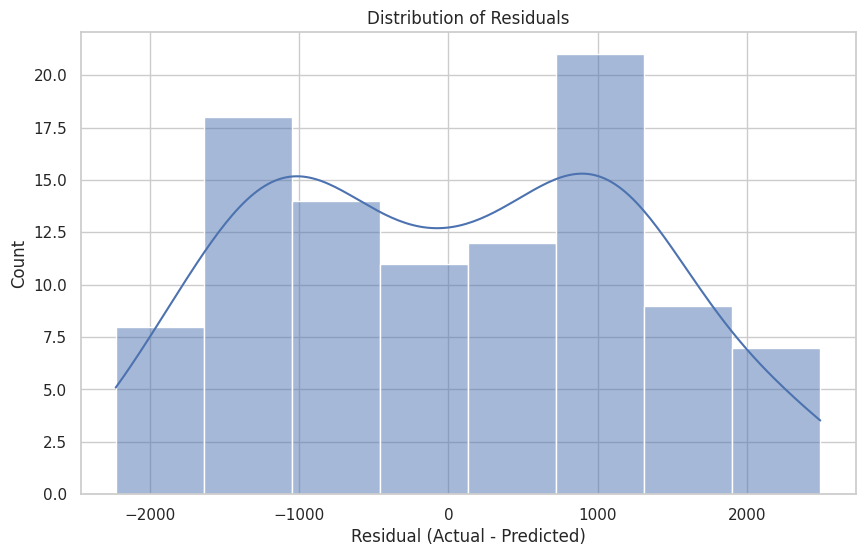

In [38]:
residuals = y_test - y_pred_rf
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

# 📉 Residual Distribution – Random Forest Model

This plot visualizes the distribution of **residuals**, which are the differences between **actual crop yields** and **predicted values** from the Random Forest model.

---

## 📊 Plot Elements:

- **Histogram Bars**: Represent the count of predictions falling within each residual range.
- **KDE Curve**: A smoothed line showing the overall shape of the residual distribution.

---

## 📌 Key Observations:

### 🔄 Residual Symmetry:
- Residuals are spread both negatively and positively, ranging from around **–2200 to +2400**.
- The distribution is **fairly symmetric**, but slightly **right-skewed**, suggesting more cases where predictions are **underestimated**.

### 🎯 Centered Around Zero:
- The residuals cluster around zero, which indicates that the model does **not exhibit systematic bias** overall.
- However, the presence of wide tails suggests **large individual errors** still occur.

### ⚠️ Heavy Tails:
- There are many residuals with absolute values greater than **1000**, indicating **high variance** in the prediction errors.
- This could imply that the model is **not capturing all key patterns or features** influencing yield.

---

In [40]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=3)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

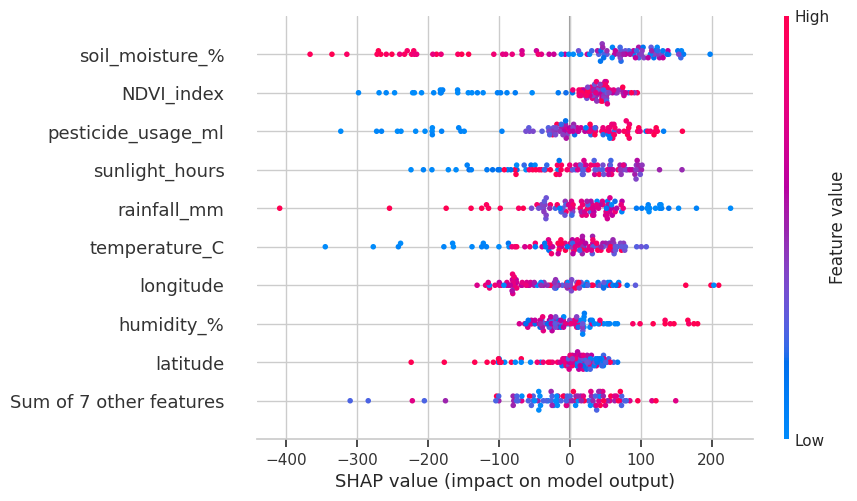

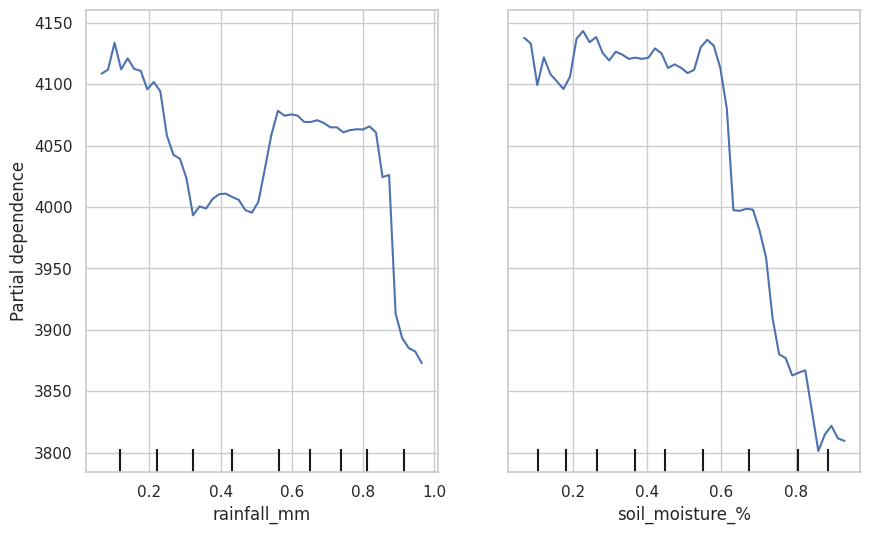

In [42]:
import shap
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    best_model,
    X_train,
    features=['rainfall_mm', 'soil_moisture_%'],
    kind='average',
    grid_resolution=50
)
plt.show()

## 🌧️🌱 Partial Dependence Plot (PDP): Rainfall and Soil Moisture vs Crop Yield

The Partial Dependence Plot (PDP) provides valuable insight into how two important features—**rainfall** and **soil moisture**—influence predicted crop yield in our machine learning model.

### 🌧️ Rainfall (left plot):
- Crop yield tends to remain relatively stable at lower rainfall levels (below **0.4 normalized units**).
- A steep decline occurs when rainfall exceeds approximately **0.8**.
- This may indicate that **excessive rainfall** negatively impacts crop productivity, possibly due to **root damage** or **nutrient leaching**.

### 🌱 Soil Moisture (right plot):
- A similar **non-linear** relationship is observed.
- Yield remains high at **moderate soil moisture**, but significantly drops when soil becomes overly saturated (> **0.65**).
- This could be due to **waterlogging** or **oxygen deprivation** to the roots.

> 📌 **Takeaway:** Both features have a non-linear effect on yield. Optimal crop performance is observed within **moderate ranges**, highlighting the need for **balanced irrigation** and proper **water management strategies**.

---

## 🔍 SHAP Summary Plot: Feature Importance & Impact

This SHAP summary plot uncovers which features influence the model’s predictions the most and in what direction.

### 🧠 Top Influencers:
- `soil_moisture_%`, `NDVI_index`, and `pesticide_usage_ml` are among the most impactful variables.
- `soil_moisture_%` shows a **wide range of SHAP values**, with **high values (in red)** negatively impacting yield predictions—supporting PDP findings on oversaturation.
- Higher `NDVI` values (Normalized Difference Vegetation Index) are associated with **positive impacts**, suggesting **healthier crops lead to higher yields**.

### 🎨 Color Encoding (Red-Blue):
- **Red dots** represent **high feature values**, and **blue dots** represent **low feature values**.
- This helps interpret how specific feature values (e.g., high pesticide use) influence yield predictions, positively or negatively.

> 📌 **Takeaway:** SHAP not only highlights the most **influential variables**, but also allows interpretation at an **individual prediction level**, making the model more **transparent and trustworthy**.


In [37]:
# Fungsi rekomendasi berdasarkan prediksi yield
def yield_recommendation(predicted_yield):
    if predicted_yield > 5000:
        return "Tingkatkan irigasi dan pemupukan untuk hasil yang lebih optimal."
    elif predicted_yield > 4000:  # New threshold
        return "Pertahankan pengelolaan tanah yang ada."
    elif predicted_yield > 3000:
        return "Evaluasi kondisi tanah dan perbaiki pemupukan."
    else:
        return "Lakukan perbaikan tanah dan evaluasi faktor pertumbuhan."

# Terapkan ke data uji
predicted_yield = lr_model.predict(X_test)
recommendations = [yield_recommendation(y) for y in predicted_yield]

# Gabungkan ke DataFrame hasil
results_df = X_test.copy()
results_df['predicted_yield'] = predicted_yield
results_df['recommendation'] = recommendations

# Tampilkan contoh output
results_df[['predicted_yield', 'recommendation']].head()

,predicted_yield,recommendation
361,3992.297295,Evaluasi kondisi tanah dan perbaiki pemupukan.
73,3965.695473,Evaluasi kondisi tanah dan perbaiki pemupukan.
374,3880.419221,Evaluasi kondisi tanah dan perbaiki pemupukan.
155,4171.906475,Pertahankan pengelolaan tanah yang ada.
104,3801.855653,Evaluasi kondisi tanah dan perbaiki pemupukan.


## 📈 Predicted Yield and Agronomic Recommendations

The table below presents predicted crop yields for selected samples, along with corresponding agronomic recommendations based on the model's output and observed patterns in the data.

| Sample ID | Predicted Yield (kg/ha) | Recommendation |
|-----------|--------------------------|----------------|
| 361       | 3992.30                  | Evaluate soil conditions and improve fertilization. |
| 73        | 3965.70                  | Evaluate soil conditions and improve fertilization. |
| 374       | 3880.42                  | Evaluate soil conditions and improve fertilization. |
| 155       | 4171.91                  | Maintain current soil management practices. |
| 104       | 3801.86                  | Evaluate soil conditions and improve fertilization. |

### 📝 Interpretation:
- **Predicted yield values** range from approximately **3800 to 4200 kg/ha**, indicating moderate to high productivity.
- For most samples, the recommendation is to **evaluate soil conditions and enhance fertilization practices**, suggesting that these fields may benefit from targeted nutrient management.
- One sample (ID 155) shows a **higher yield prediction** and receives the recommendation to **maintain current soil management**, indicating that the existing practices are likely effective.

> 📌 These insights can help prioritize interventions, optimize fertilizer use, and improve overall crop performance through data-driven decision making.